<a href="https://colab.research.google.com/github/AMEERKOTTA/hands_on_machine_learning_with_sklearn_keras_and_tensorflow/blob/main/Chapter%2015%20-%20Processing%20Sequences%20Using%20RNNs%20and%20CNNs/04_basic_deep_rnn_model_using_dense_layer_by_the_end_for_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEEP RNN MODEL FOR FORECASTING USING DENSE LAYER BY THE END**

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN

In [2]:
## define a function to generate time series
def generate_time_series(batch_size, n_steps):
  """ Function Returns a Numpy array of shape [batch_size, time steps, 1]
      Series is a sum of two sine waves of fixed amplitudes.
      But random frequencies and phases, plus some noise.
      :param :- batch_size : number of data points.
      :param :- n_steps :- number of steps.
  """
  freq1, freq2, offset1, offset2 = np.random.randn(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)
  series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
  series += 0.1 * np.sin(np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
## define the sequence data, time series data.
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print(X_train.shape)  ## [batch_size, time steps, dimensionality]
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 50, 1)
(7000, 1)
(2000, 50, 1)
(2000, 1)
(1000, 50, 1)
(1000, 1)


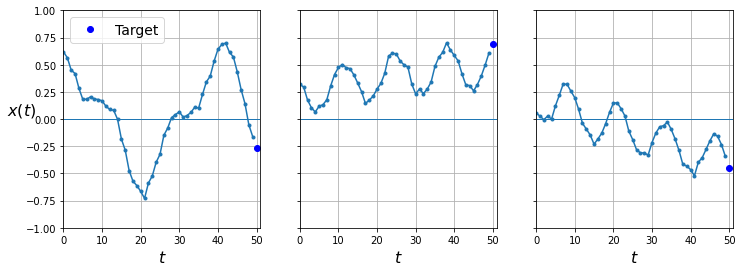

In [4]:
## plot the series
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

## plotting validation set graph.

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

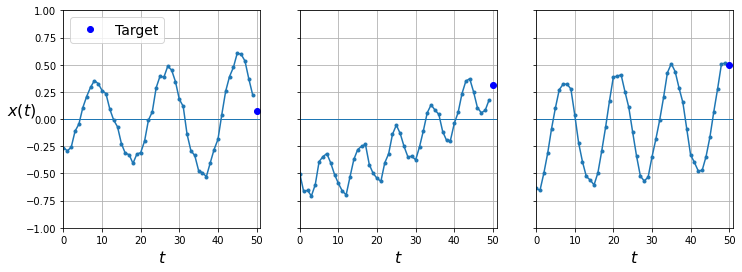

In [5]:
## plotting the training set graph

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_train[col, :, 0], y_train[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

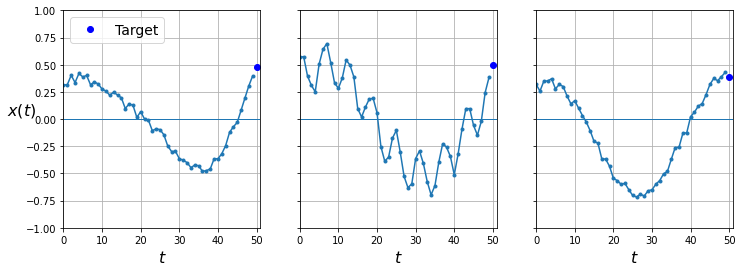

In [6]:
## plotting the testing set graph

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_test[col, :, 0], y_test[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

In [18]:
## Deep RNN with three layers.
## including two hidden layer.
## one output layer.
## return sequneces = True or the layers of hidden layers.
## bcz in keras, rnn layers will only return the final output.
## to make them return one output per time step.
## set return_sequences = True.
## by using the Dense layer, seems that model converges faster than simple RNN layer.
## and also if we want to change the default "tanh" activation function.
## we can use the Dense Layer.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [19]:
## compile the model
model.compile(
    loss = "mse",
    optimizer = "adam"
)

In [20]:
## train the model
r = model.fit(X_train, y_train,
              validation_data = (X_valid, y_valid),
              epochs = 20)

Epoch 1/20
219/219 [==============================] - 8s 26ms/step - loss: 0.0454 - val_loss: 0.0147
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0107 - val_loss: 0.0091
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 4/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 5/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 7/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 8/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 9/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 10/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0064 - val_lo

In [21]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 7ms/step - loss: 0.0062


0.006212421227246523

+ Baseline Metrics MSE : 0.016787494
+ Previous Linear Regression MSE : 0.01014
+ SimpleRNN Model MSE : 0.00984
+ Deep RNN Model MSE : 0.004485
+ Deep RNN using Dense Layer : 0.0062124

Here it is Clear that Simple RNN Could not improve the Prediction Much Better.

It is almost similar to the Previous Linear Regression Model.

But the Deep RNN is Improved to a MSE score of 0.004.

Using the Deep RNN the model is doing almost similar to previous Model.

Here, the But can see a speedy Convergence than Previous Model.


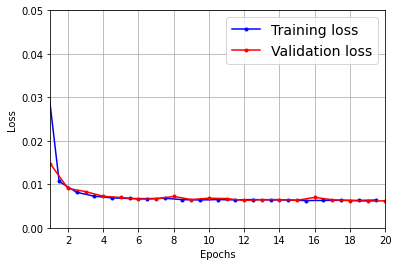

In [22]:
## plot the loss
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(r.history["loss"], r.history["val_loss"])
plt.show();

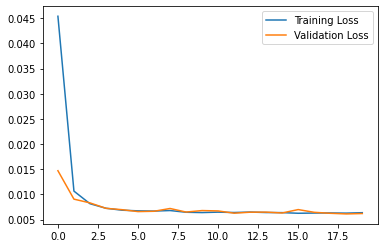

In [23]:
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

63/63 [==============================] - 1s 7ms/step


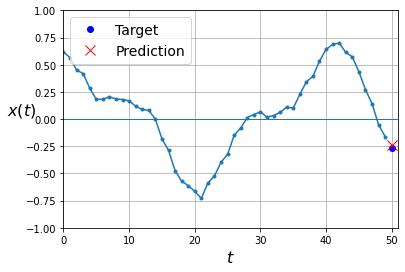

In [24]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show();

The Prediction is almost Similar.
***